# Exact General Relativistic Rotating Disks Immersed in Rotating Dust Generated from van Stockum Solutions  by Bogt and Letelier
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 22, 2022

Here we concentrate of metric 1

https://arxiv.org/abs/1304.2964

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
t,r,phi,z,dt,dr,dphi,dz = symbols('t r phi z dt dr dphi dz')

In [4]:
n = Function('N')(r,z)
n

In [5]:
nu = Function('nu')(r,z)
nu

In [62]:
Phi = Function('Phi')(r,z)
Phi

In [6]:
variables = Matrix([t,r,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix([dt,dr,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [10]:
lineElement = expand( (dt - n * dphi)**2 - (r**2 * dphi**2) - exp(nu)*(dr**2 + dz**2) ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡   1          0         -N(r, z)          0    ⎤
⎢                                               ⎥
⎢            ν(r, z)                            ⎥
⎢   0      -ℯ                0             0    ⎥
⎢                                               ⎥
⎢                        2    2                 ⎥
⎢-N(r, z)      0      - r  + N (r, z)      0    ⎥
⎢                                               ⎥
⎢                                        ν(r, z)⎥
⎣   0          0             0         -ℯ       ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡   1          0         -N(r, z)          0    ⎤
⎢                                               ⎥
⎢            ν(r, z)                            ⎥
⎢   0      -ℯ                0             0    ⎥
⎢                                               ⎥
⎢                        2    2                 ⎥
⎢-N(r, z)      0      - r  + N (r, z)      0    ⎥
⎢                                               ⎥
⎢                                        ν(r, z)⎥
⎣   0          0             0         -ℯ       ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                                      
⎢                                                                                                                                      
⎢⎡                                          ∂                                                                                       ∂  
⎢⎢                                  N(r, z)⋅──(N(r, z))                                                                     N(r, z)⋅──(
⎢⎢                                          ∂r                                                                                      ∂z 
⎢⎢         0                        ───────────────────                                      0                              ───────────
⎢⎢                                             2                                                                                       
⎢⎢                                          2⋅r 

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                                                                      
⎢                                   ⎛             2                2⎞                                                                  
⎢                                   ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟  -ν(r, z)                                                        
⎢                                   ⎜⎜──(N(r, z))⎟  + ⎜──(N(r, z))⎟ ⎟⋅ℯ                                                                
⎢                                   ⎝⎝∂r         ⎠    ⎝∂z         ⎠ ⎠                                                                  
⎢                                   ───────────────────────────────────────────                                                        
⎢                                                          2                                                                           
⎢                                               

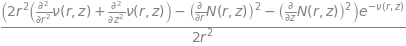

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                          ⎛     ⎛  2              2         ⎞         
⎢                                       ⎛             2                2⎞                  ⎜   2 ⎜ ∂              ∂          ⎟   ⎛∂    
⎢                                       ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟  -ν(r, z)   0.25⋅⎜2⋅r ⋅⎜───(ν(r, z)) + ───(ν(r, z))⎟ - ⎜──(N(
⎢                                       ⎜⎜──(N(r, z))⎟  + ⎜──(N(r, z))⎟ ⎟⋅ℯ                ⎜     ⎜  2              2         ⎟   ⎝∂r   
⎢                                       ⎝⎝∂r         ⎠    ⎝∂z         ⎠ ⎠                  ⎝     ⎝∂r             ∂z          ⎠         
⎢                                       ─────────────────────────────────────────── - ─────────────────────────────────────────────────
⎢                                                              2                                                                 2     
⎢                                               

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [22]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                                                                      
⎢                                   ⎛             2                2⎞                                                                  
⎢                                   ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟  -ν(r, z)                                                        
⎢                                   ⎜⎜──(N(r, z))⎟  + ⎜──(N(r, z))⎟ ⎟⋅ℯ                                                                
⎢                                   ⎝⎝∂r         ⎠    ⎝∂z         ⎠ ⎠                                                                  
⎢                                   ───────────────────────────────────────────                                                        
⎢                                                          2                                                                           
⎢                                               

In [23]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                 ⎛     ⎛  2              2         ⎞                    2                    2⎞       
⎢                                                 ⎜   2 ⎜ ∂              ∂          ⎟       ⎛∂          ⎞        ⎛∂          ⎞ ⎟  -ν(r,
⎢                                                 ⎜- r ⋅⎜───(ν(r, z)) + ───(ν(r, z))⎟ + 1.5⋅⎜──(N(r, z))⎟  + 1.5⋅⎜──(N(r, z))⎟ ⎟⋅ℯ     
⎢                                                 ⎜     ⎜  2              2         ⎟       ⎝∂r         ⎠        ⎝∂z         ⎠ ⎟       
⎢                                                 ⎝     ⎝∂r             ∂z          ⎠                                          ⎠       
⎢                                                 ─────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                              2                                       
⎢                                               

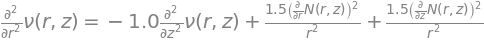

In [56]:
d2nudr2 = Eq(diff(nu,r,r), expand( solve( einsteinSimplified[0,0].args[2], diff(nu,r,r) )[0] ) )
d2nudr2

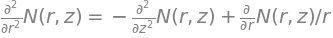

In [59]:
equation2a = Eq(diff(N,r,r), solve( einsteinSimplified[0,2].args[2].subs(d2nudr2.lhs,d2nudr2.rhs), diff(N,r,r) )[0] ) 
equation2a

In [26]:
equation2b1 = Eq( diff(nu,z), solve( ricciSimplified[3,1], diff(nu,z) )[0] ) 
equation2b1

In [30]:
equation2b2 =  Eq(diff(nu,r), expand( solve( einsteinSimplified[1,1], diff(nu,r) )[0] ) ) 
equation2b2

In [61]:
vacuumFieldEquations = Matrix([equation2a,equation2b1,equation2b2])
vacuumFieldEquations

⎡                                      ∂                ⎤
⎢        2                2            ──(N(r, z))      ⎥
⎢       ∂                ∂             ∂r               ⎥
⎢      ───(N(r, z)) = - ───(N(r, z)) + ───────────      ⎥
⎢        2                2                 r           ⎥
⎢      ∂r               ∂z                              ⎥
⎢                                                       ⎥
⎢                       ∂           ∂                   ⎥
⎢                      -──(N(r, z))⋅──(N(r, z))         ⎥
⎢        ∂              ∂r          ∂z                  ⎥
⎢        ──(ν(r, z)) = ─────────────────────────        ⎥
⎢        ∂z                        r                    ⎥
⎢                                                       ⎥
⎢                                 2                    2⎥
⎢                    ⎛∂          ⎞        ⎛∂          ⎞ ⎥
⎢                0.5⋅⎜──(N(r, z))⎟    0.5⋅⎜──(N(r, z))⎟ ⎥
⎢∂                   ⎝∂r         ⎠        ⎝∂z         ⎠ ⎥
⎢──(ν(r, z)) =

In [63]:
equation3a = Eq(n, r * diff(Phi,r))
equation3a

In [69]:
equation3b = Eq(diff(Phi,r), solve(equation3a, diff(Phi,r) )[0] ) 
equation3b

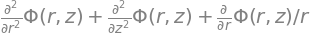

In [71]:
equation3 = diff(Phi,r,r) + diff(Phi,z,z) +(1/r)*diff(Phi,r) 
equation3